<a href="https://colab.research.google.com/github/shibukawar/stein-importance-sampling-qa/blob/feature%2Fstein-importance-sampling/notebook/example_stein_importance_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments on free energy and magnetization

In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from stein.util import pload

In [3]:
annealing_time = 5
annealing_time = float(annealing_time)
PROBLEM_LIST = ["GSD_8", "GSD_38", "GSD_F_6"]
target_temperature_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

/var/folders/lf/trvmp06n16n71bhjmxg74bbw0000gn/T/ipykernel_83613/3000060999.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


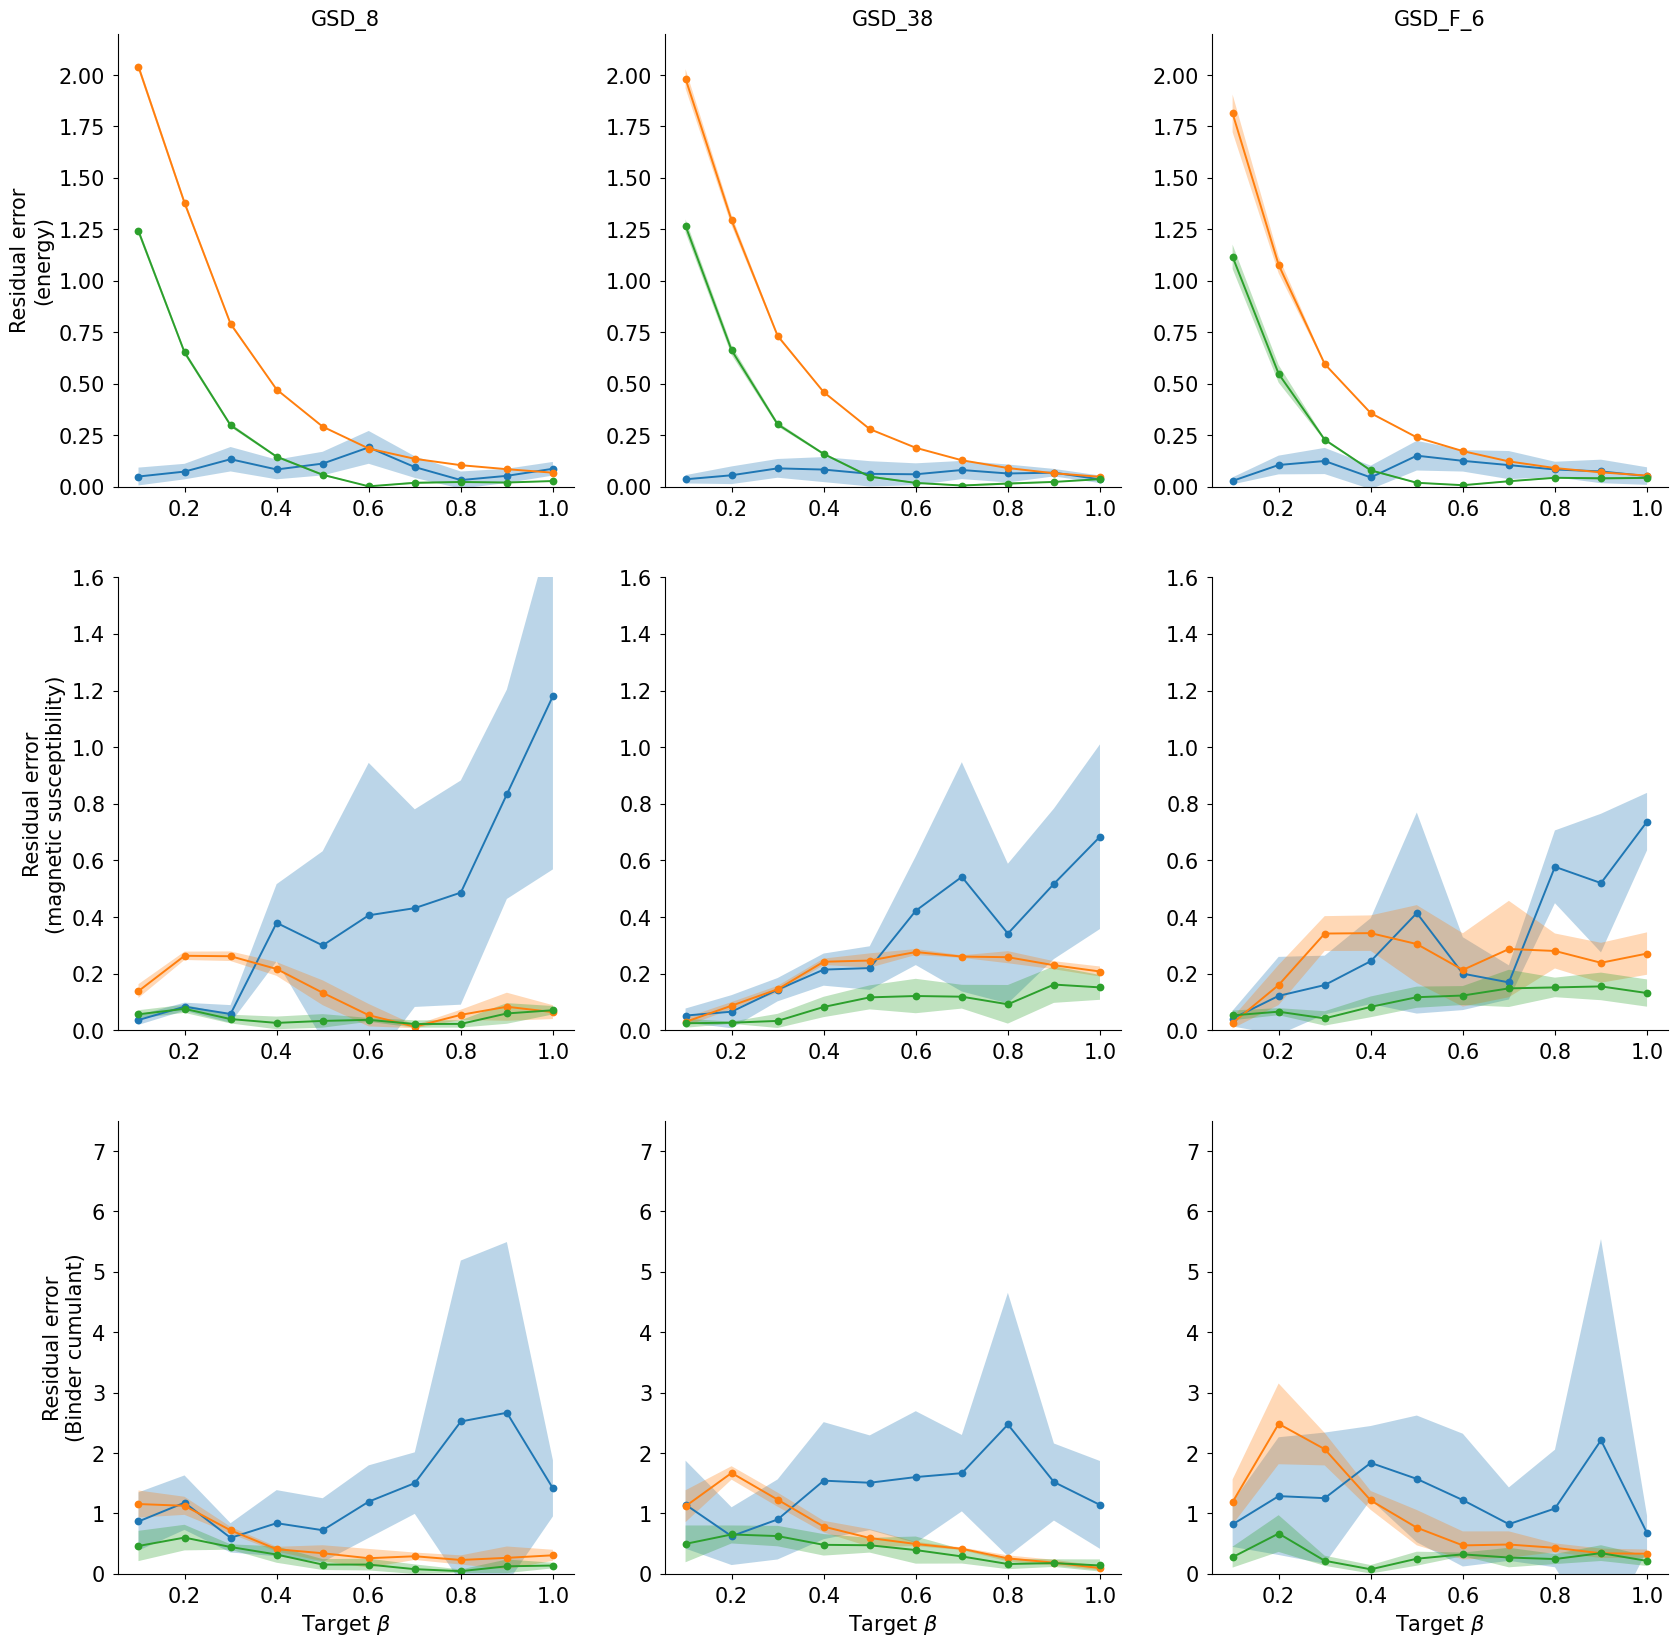

In [4]:
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(20, 20)
count = 0
dat_list = ['energy', 'sus', 'u4']
axs = axs.flat
for k in dat_list:
    for PROBLEM in PROBLEM_LIST:
        ax = axs[count]
        PROBLEM_DIR_PATH = f"./problems/{PROBLEM}/"
        mcmc_path = os.path.join(PROBLEM_DIR_PATH, 'mcmc_2000.pickle.gz2')
        mcmc_result = pload(mcmc_path)
        mcmc = mcmc_result[k]
        for i, target_temperature in enumerate(target_temperature_list):
            path = os.path.join(PROBLEM_DIR_PATH, f"raw_data_{annealing_time}_{target_temperature}.pickle.gz2")
            data = pload(path)
            mcmc[i] = np.abs((mcmc[i] - data[k]['exact']) / data[k]['exact'])
        mcmc_mean = np.nanmean(mcmc, axis=1)
        mcmc_std = np.array([np.nanstd(a) for a in mcmc])
        exact = []
        emp, corr = [], []
        emp_std, corr_std = [], []
        for target_temperature in target_temperature_list:
            path = os.path.join(PROBLEM_DIR_PATH, f"raw_data_{annealing_time}_{target_temperature}.pickle.gz2")
            data = pload(path)
            exv = data[k]['exact']
            exact.append(data[k]['exact'])
            emp_k_list = np.abs((np.array(data[k]['emp'][-1]) - exv) / exv)
            emp.append(np.mean(emp_k_list))
            emp_std.append(np.std(emp_k_list))
            corr_k_list = np.abs((np.array(data[k]['corr'][-1]) - exv) / exv)
            corr.append(np.mean(corr_k_list))
            corr_std.append(np.std(corr_k_list))
        emp = np.array(emp)
        corr = np.array(corr)
        emp_std = np.array(emp_std)
        corr_std = np.array(corr_std)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.plot(target_temperature_list, mcmc_mean, 'o', linestyle='-', label='Metropolis')
        ax.fill_between(target_temperature_list, mcmc_mean - mcmc_std, mcmc_mean + mcmc_std, alpha=.3)
        ax.plot(target_temperature_list, emp, 'o', linestyle='-', label='QA')
        ax.fill_between(target_temperature_list, emp - emp_std, emp + emp_std, alpha=.3)
        ax.plot(target_temperature_list, corr, 'o', linestyle='-', label='QA + SIS')
        ax.fill_between(target_temperature_list, corr- corr_std, corr + corr_std, alpha=.3)
        ax.set_ylim(0)
        ax.tick_params(axis='both', which='major', labelsize=15)
        # if count == 2:
        if k == 'energy':
            ax.set_ylim(0, 2.2)
        if k == 'sus':
            ax.set_ylim(0, 1.6)
        if k == 'u4':
            ax.set_ylim(0, 7.5)
        if k == 'energy' and count == 0:
            ax.set_ylabel('Residual error\n(energy)', fontsize=15)
        if k == 'sus' and count == 3:
            ax.set_ylabel('Residual error\n(magnetic susceptibility)', fontsize=15)
        if k == 'u4' and count == 6:
            ax.set_ylabel('Residual error\n(Binder cumulant)', fontsize=15)
        if count in [0, 1, 2]:
            ax.set_title(PROBLEM, fontsize=15)
        # if count == 3:
        # ax.legend(frameon=False,  bbox_to_anchor=(1.0,.8), fontsize=15)
        # if count == 4:
        if count in [6,7,8]:
            ax.set_xlabel(r'Target $\beta$', fontsize=15)
        # ax.set_ylim(-30, -2.5)
        count += 1
plt.savefig(os.path.join('figures', 'beta_error.pdf'), bbox_inches='tight', pad_inches=0.1)
plt.savefig(os.path.join('figures', 'beta_error.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()


/var/folders/lf/trvmp06n16n71bhjmxg74bbw0000gn/T/ipykernel_83613/2433844446.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


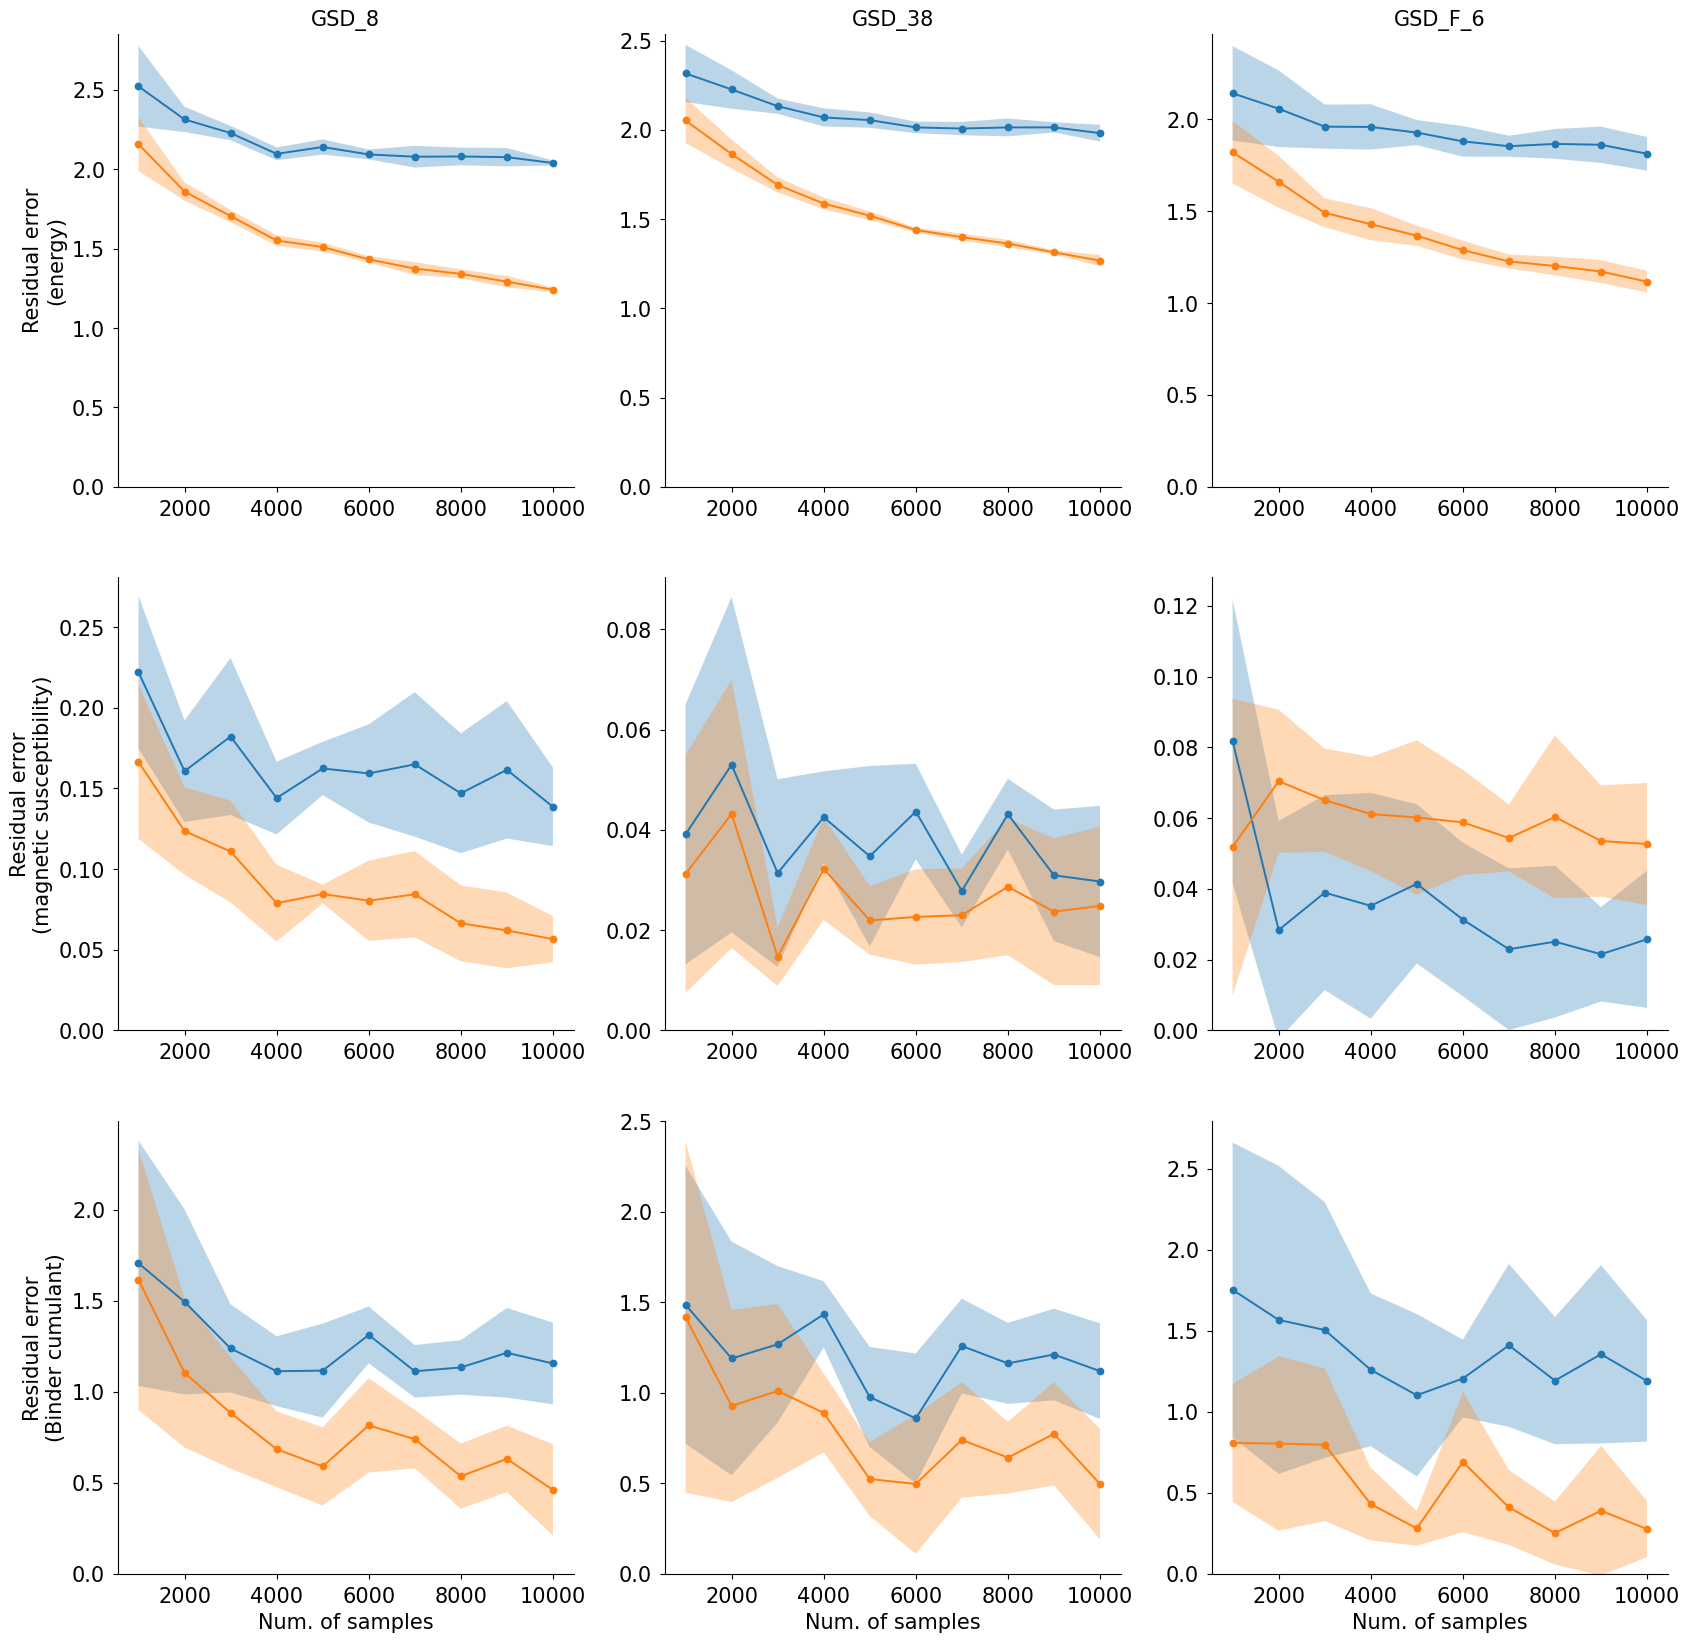

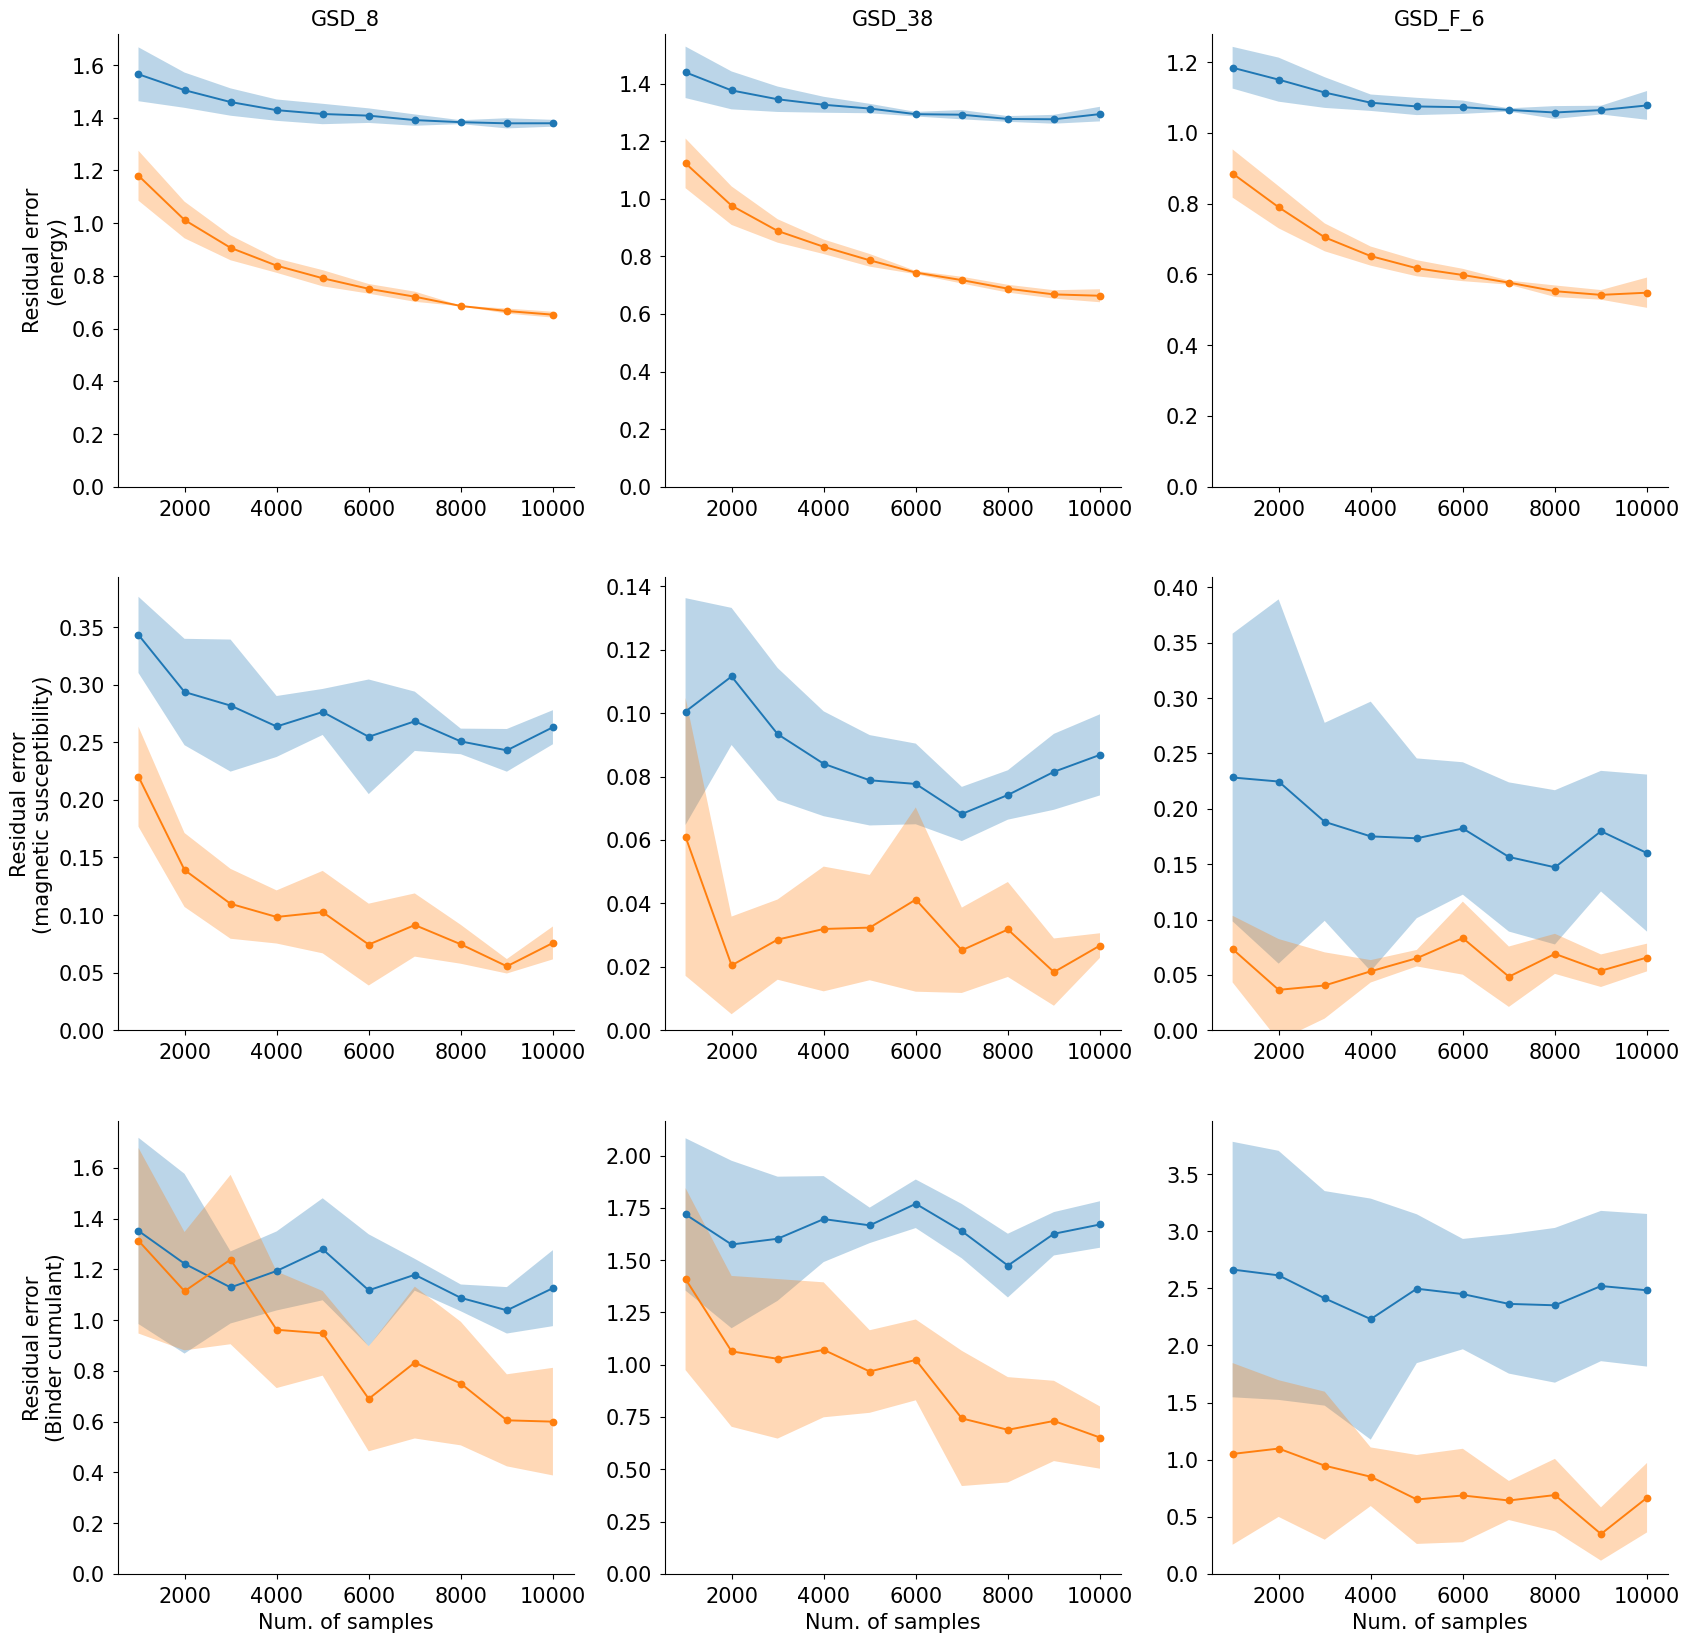

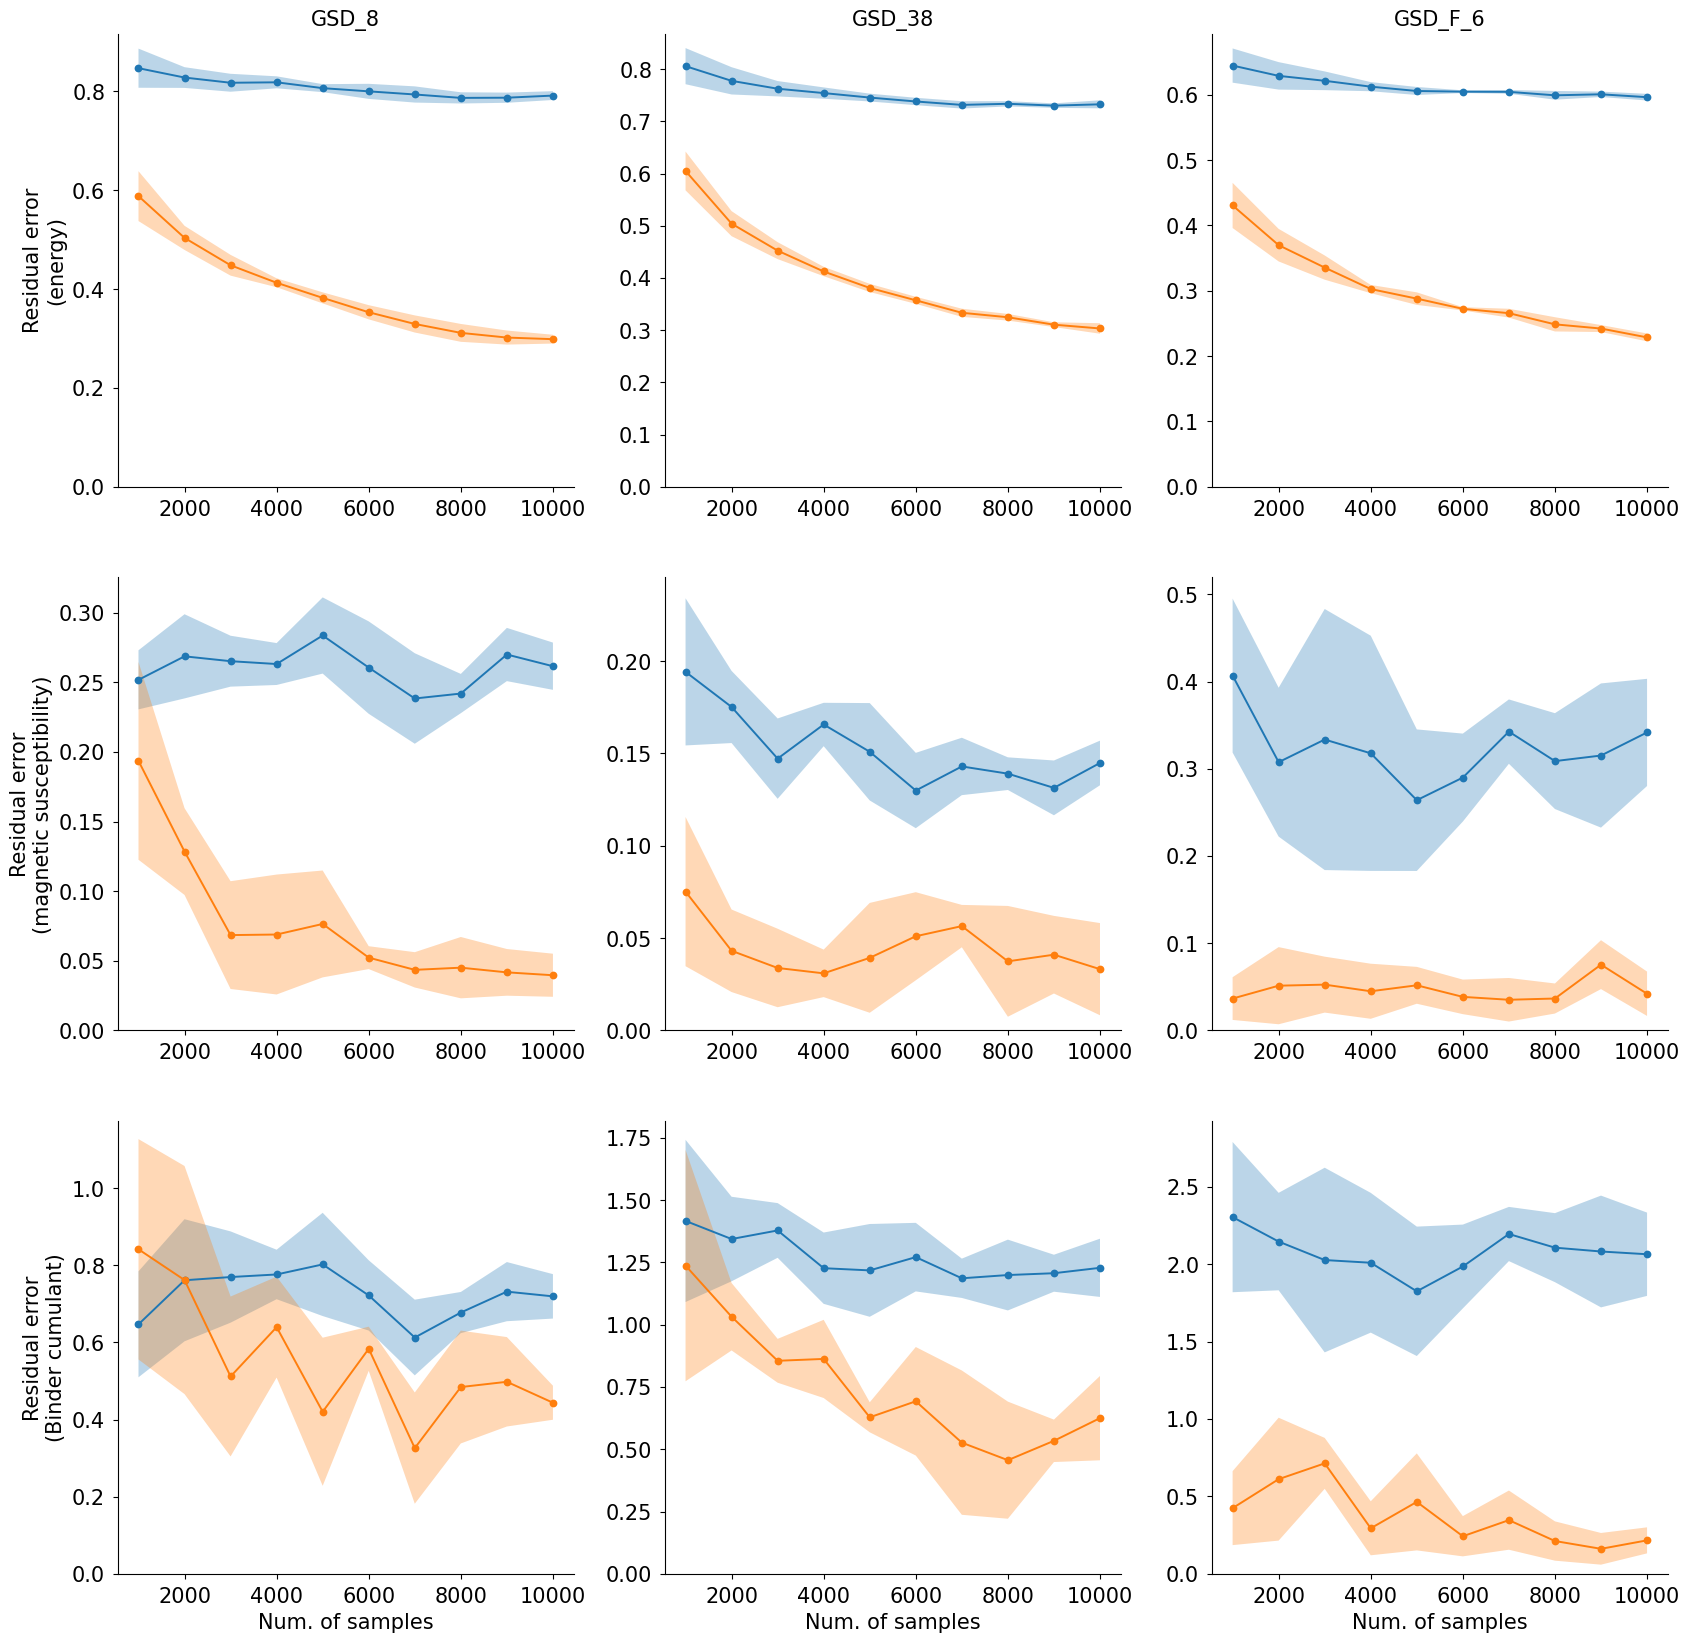

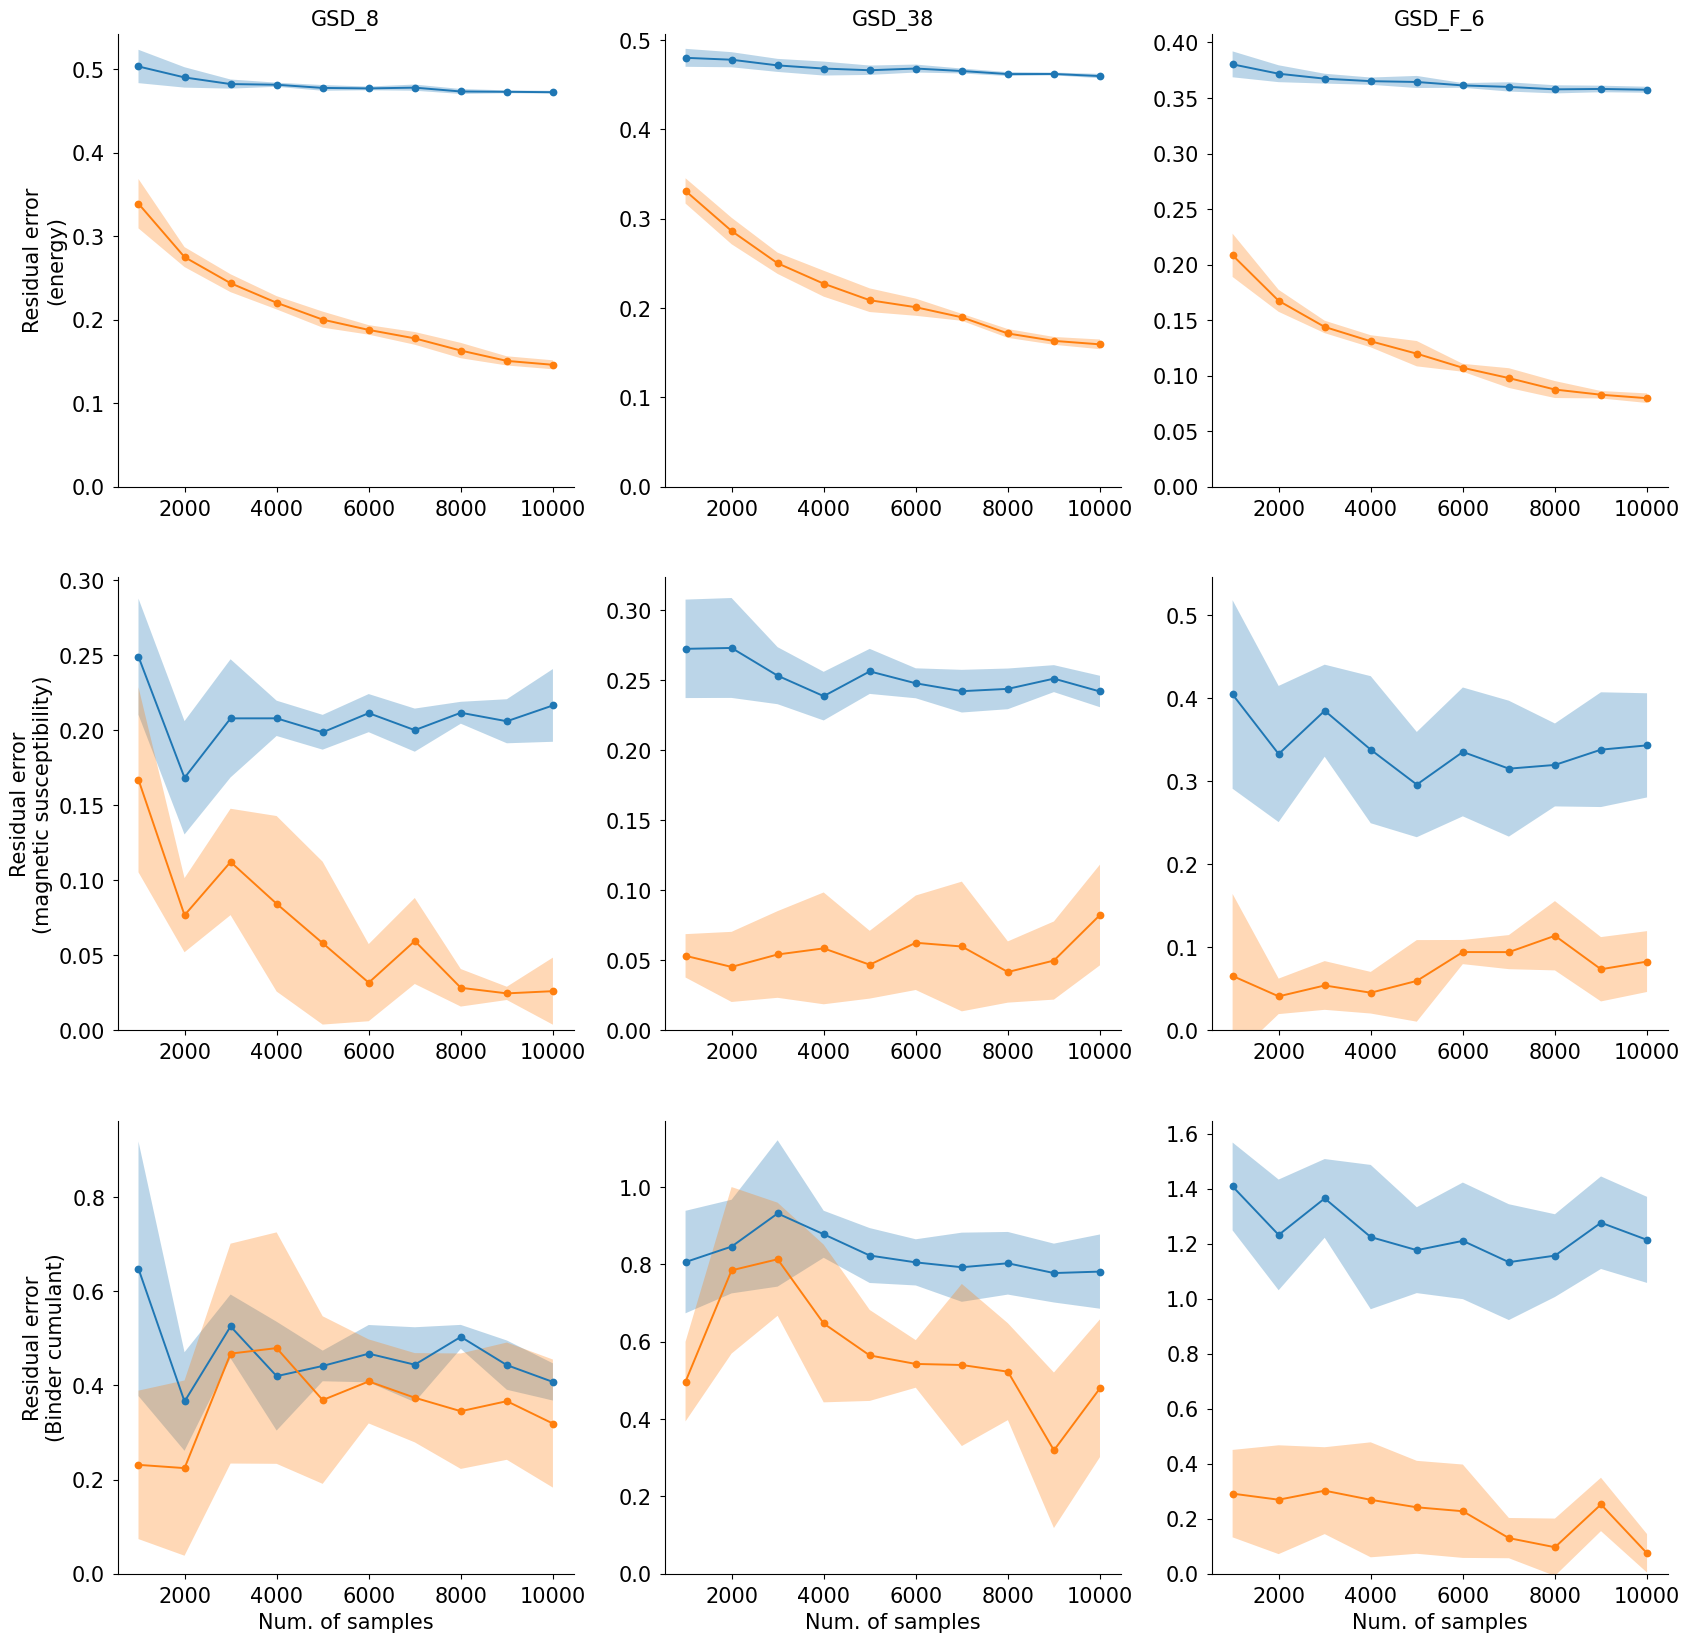

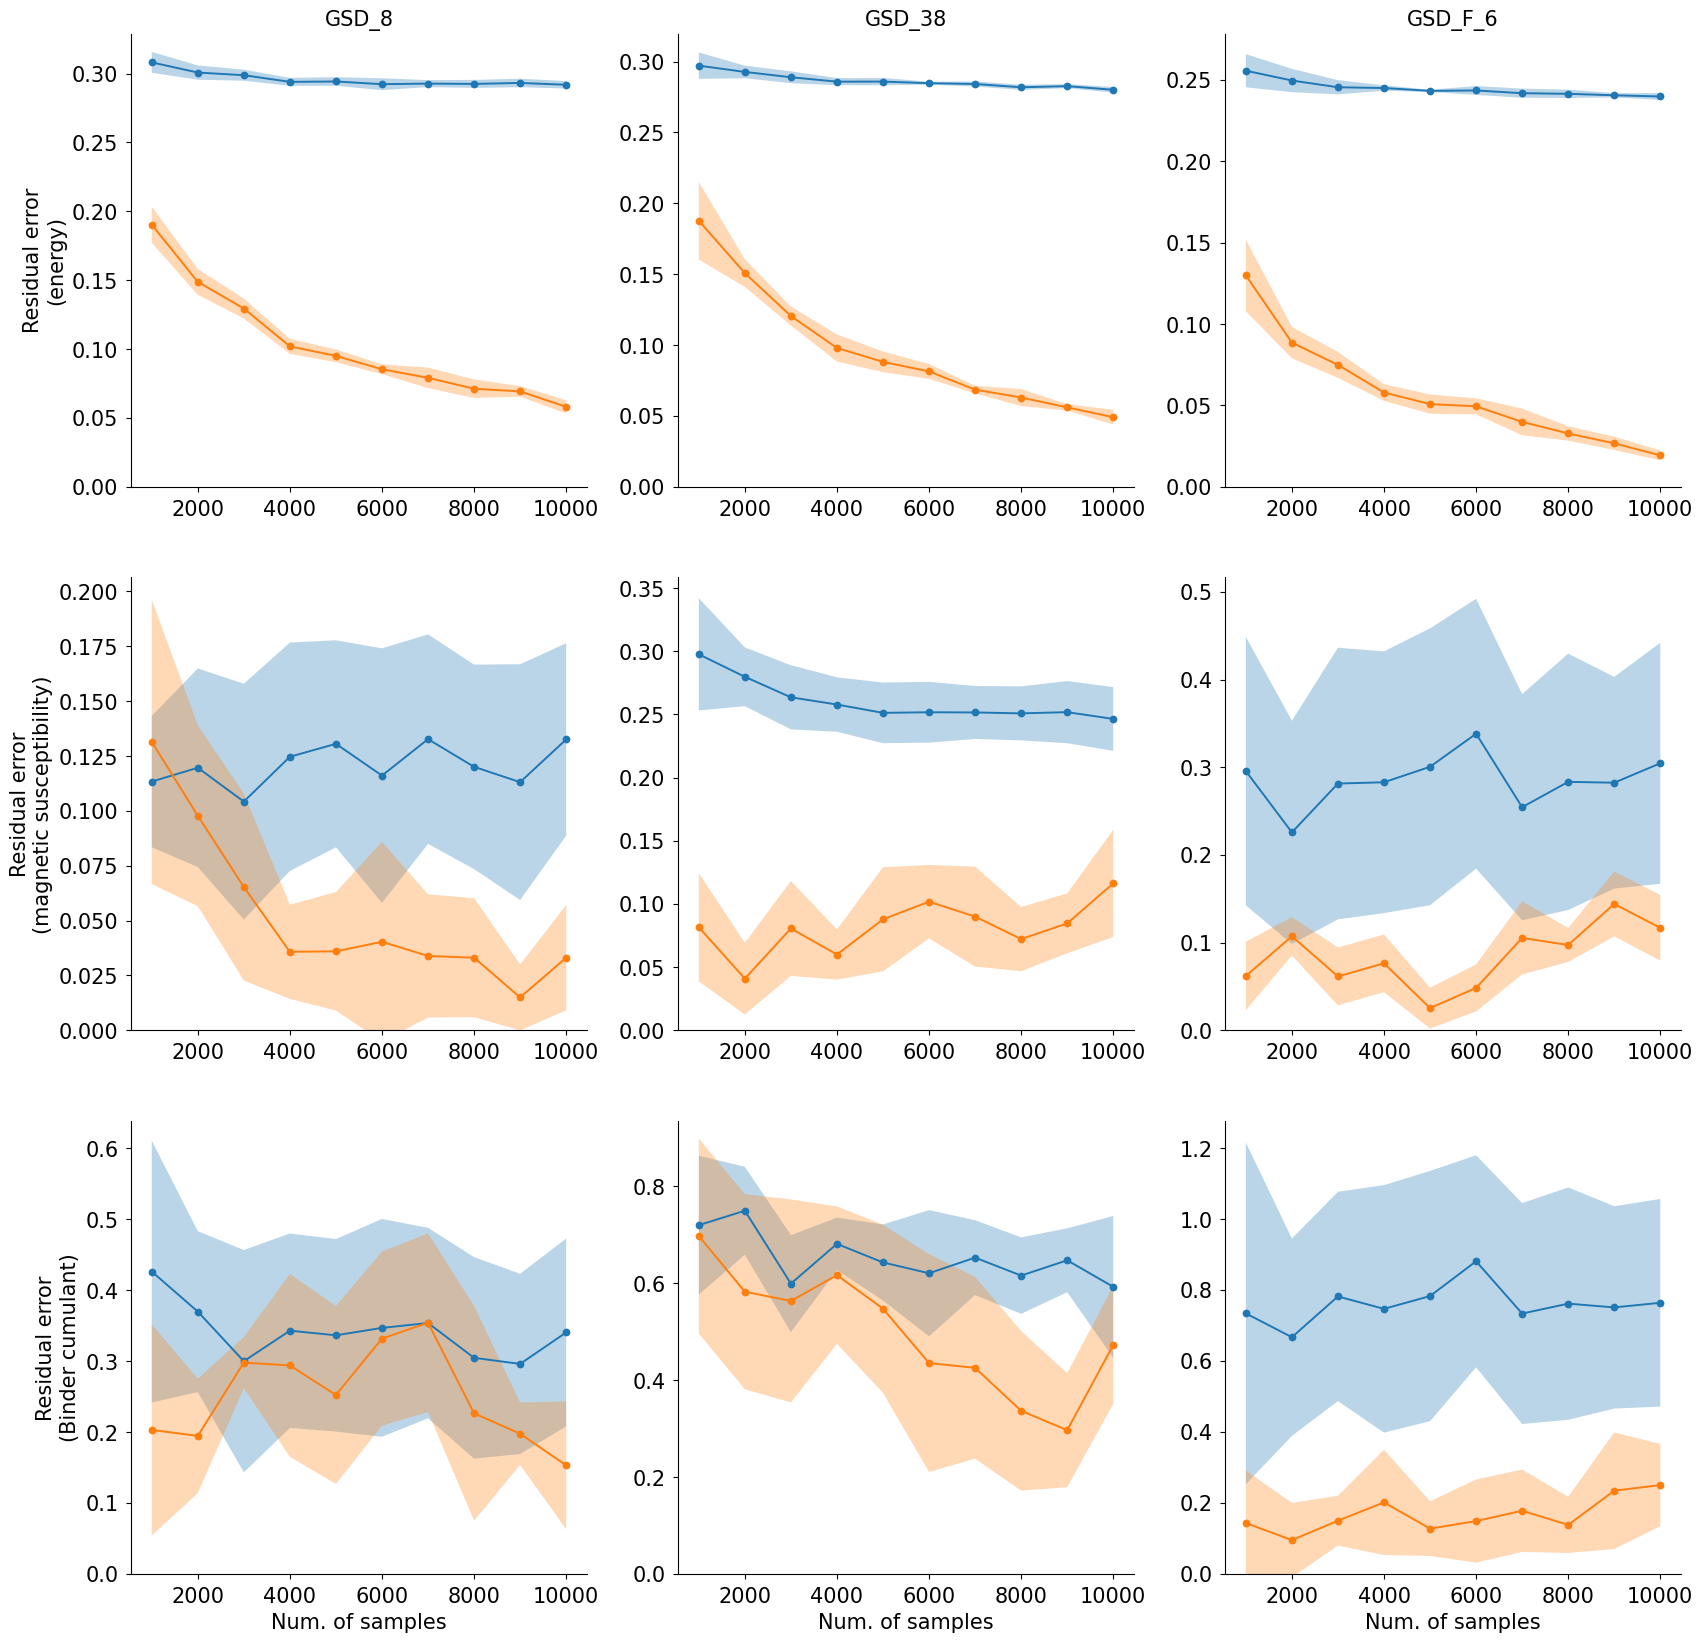

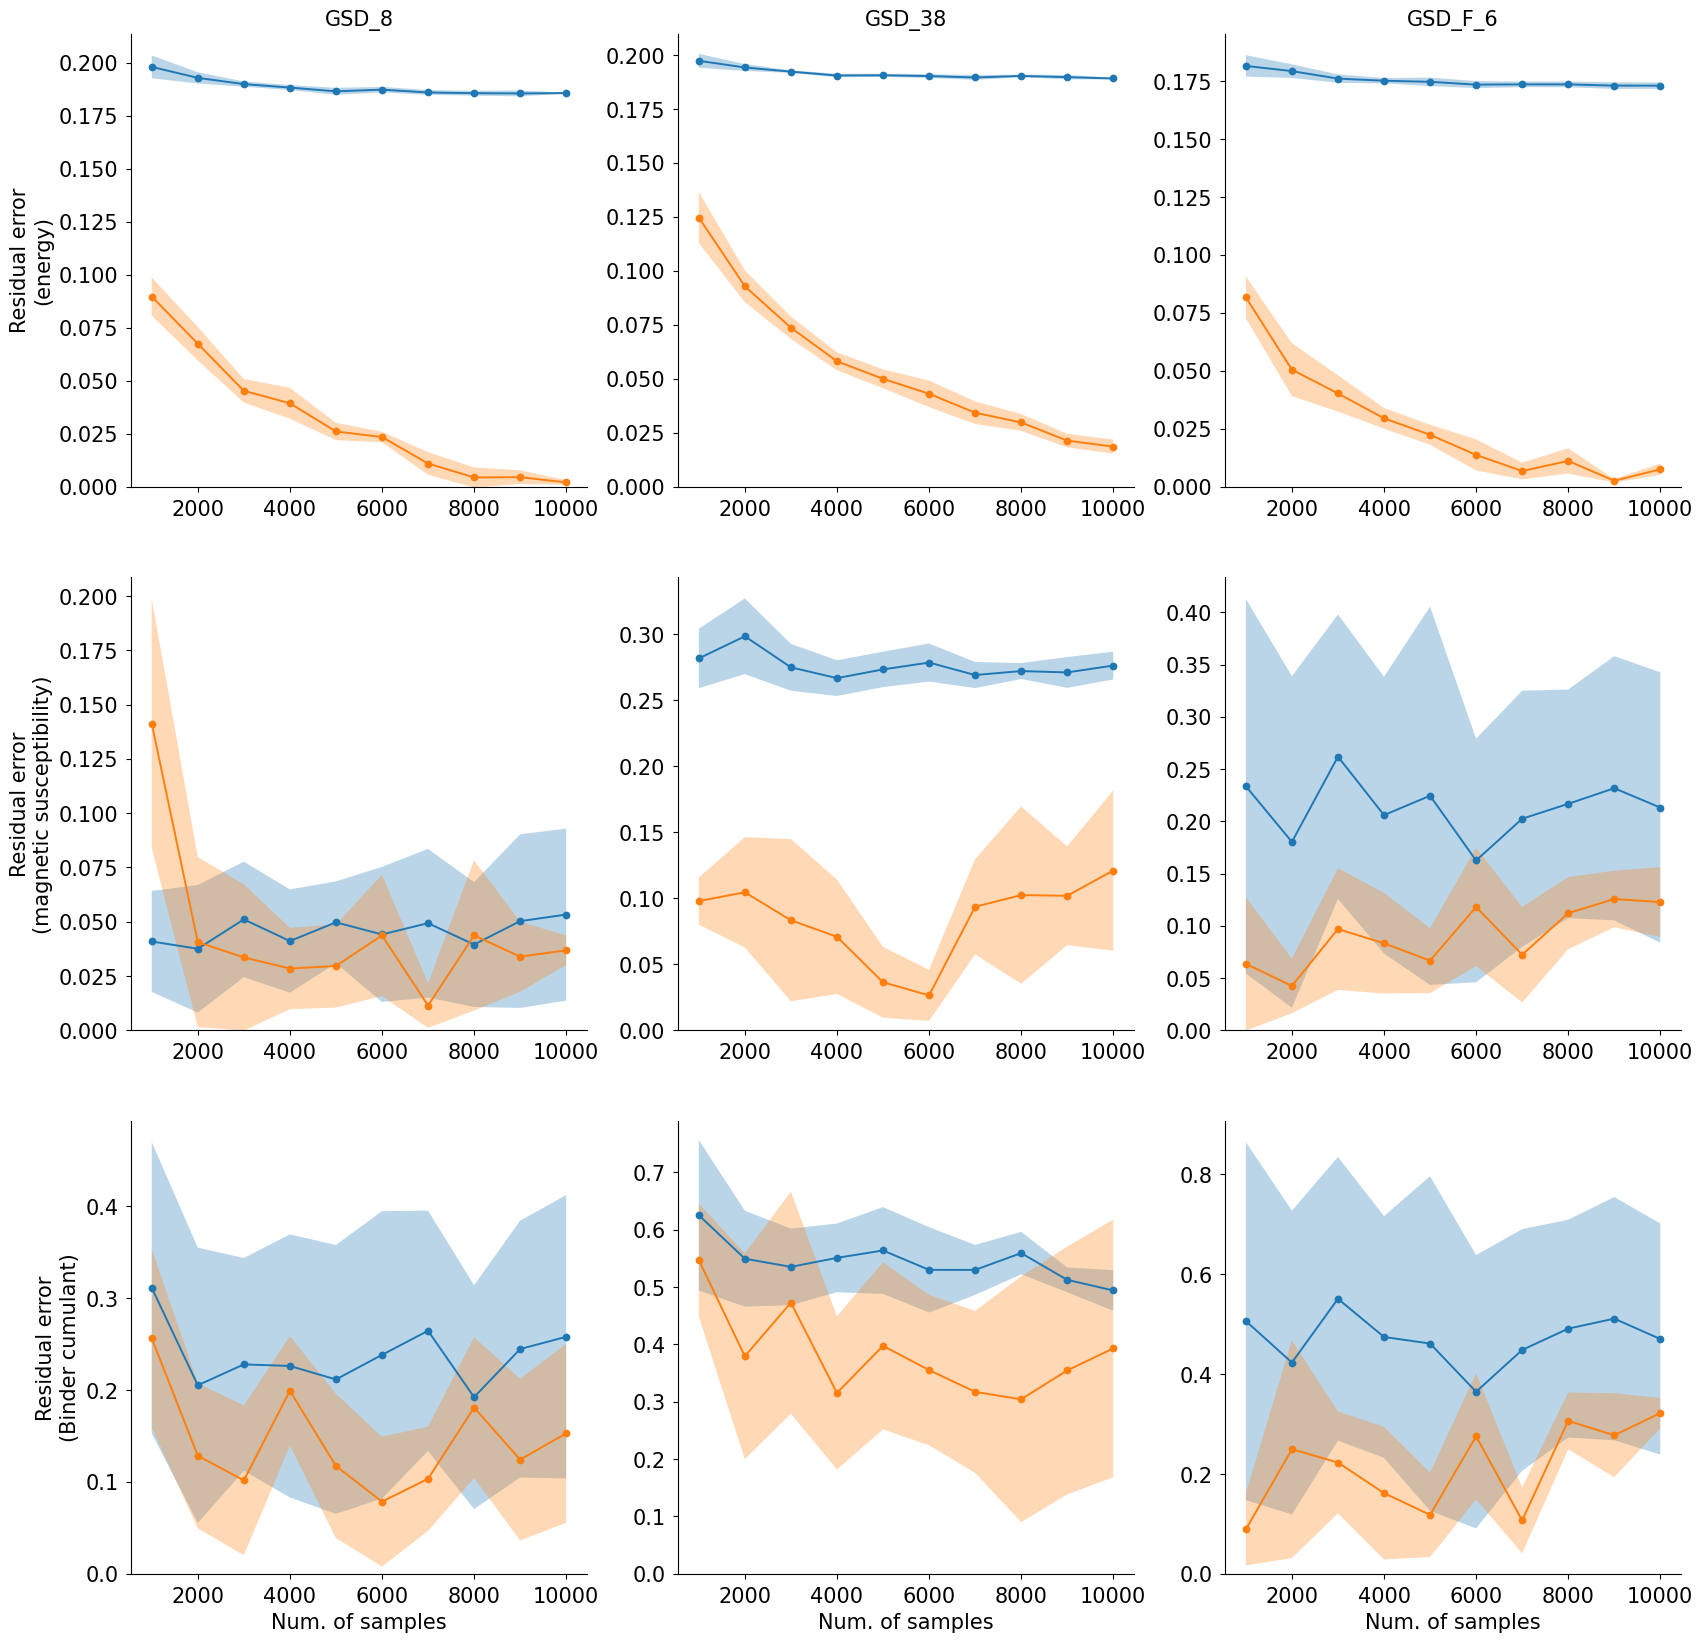

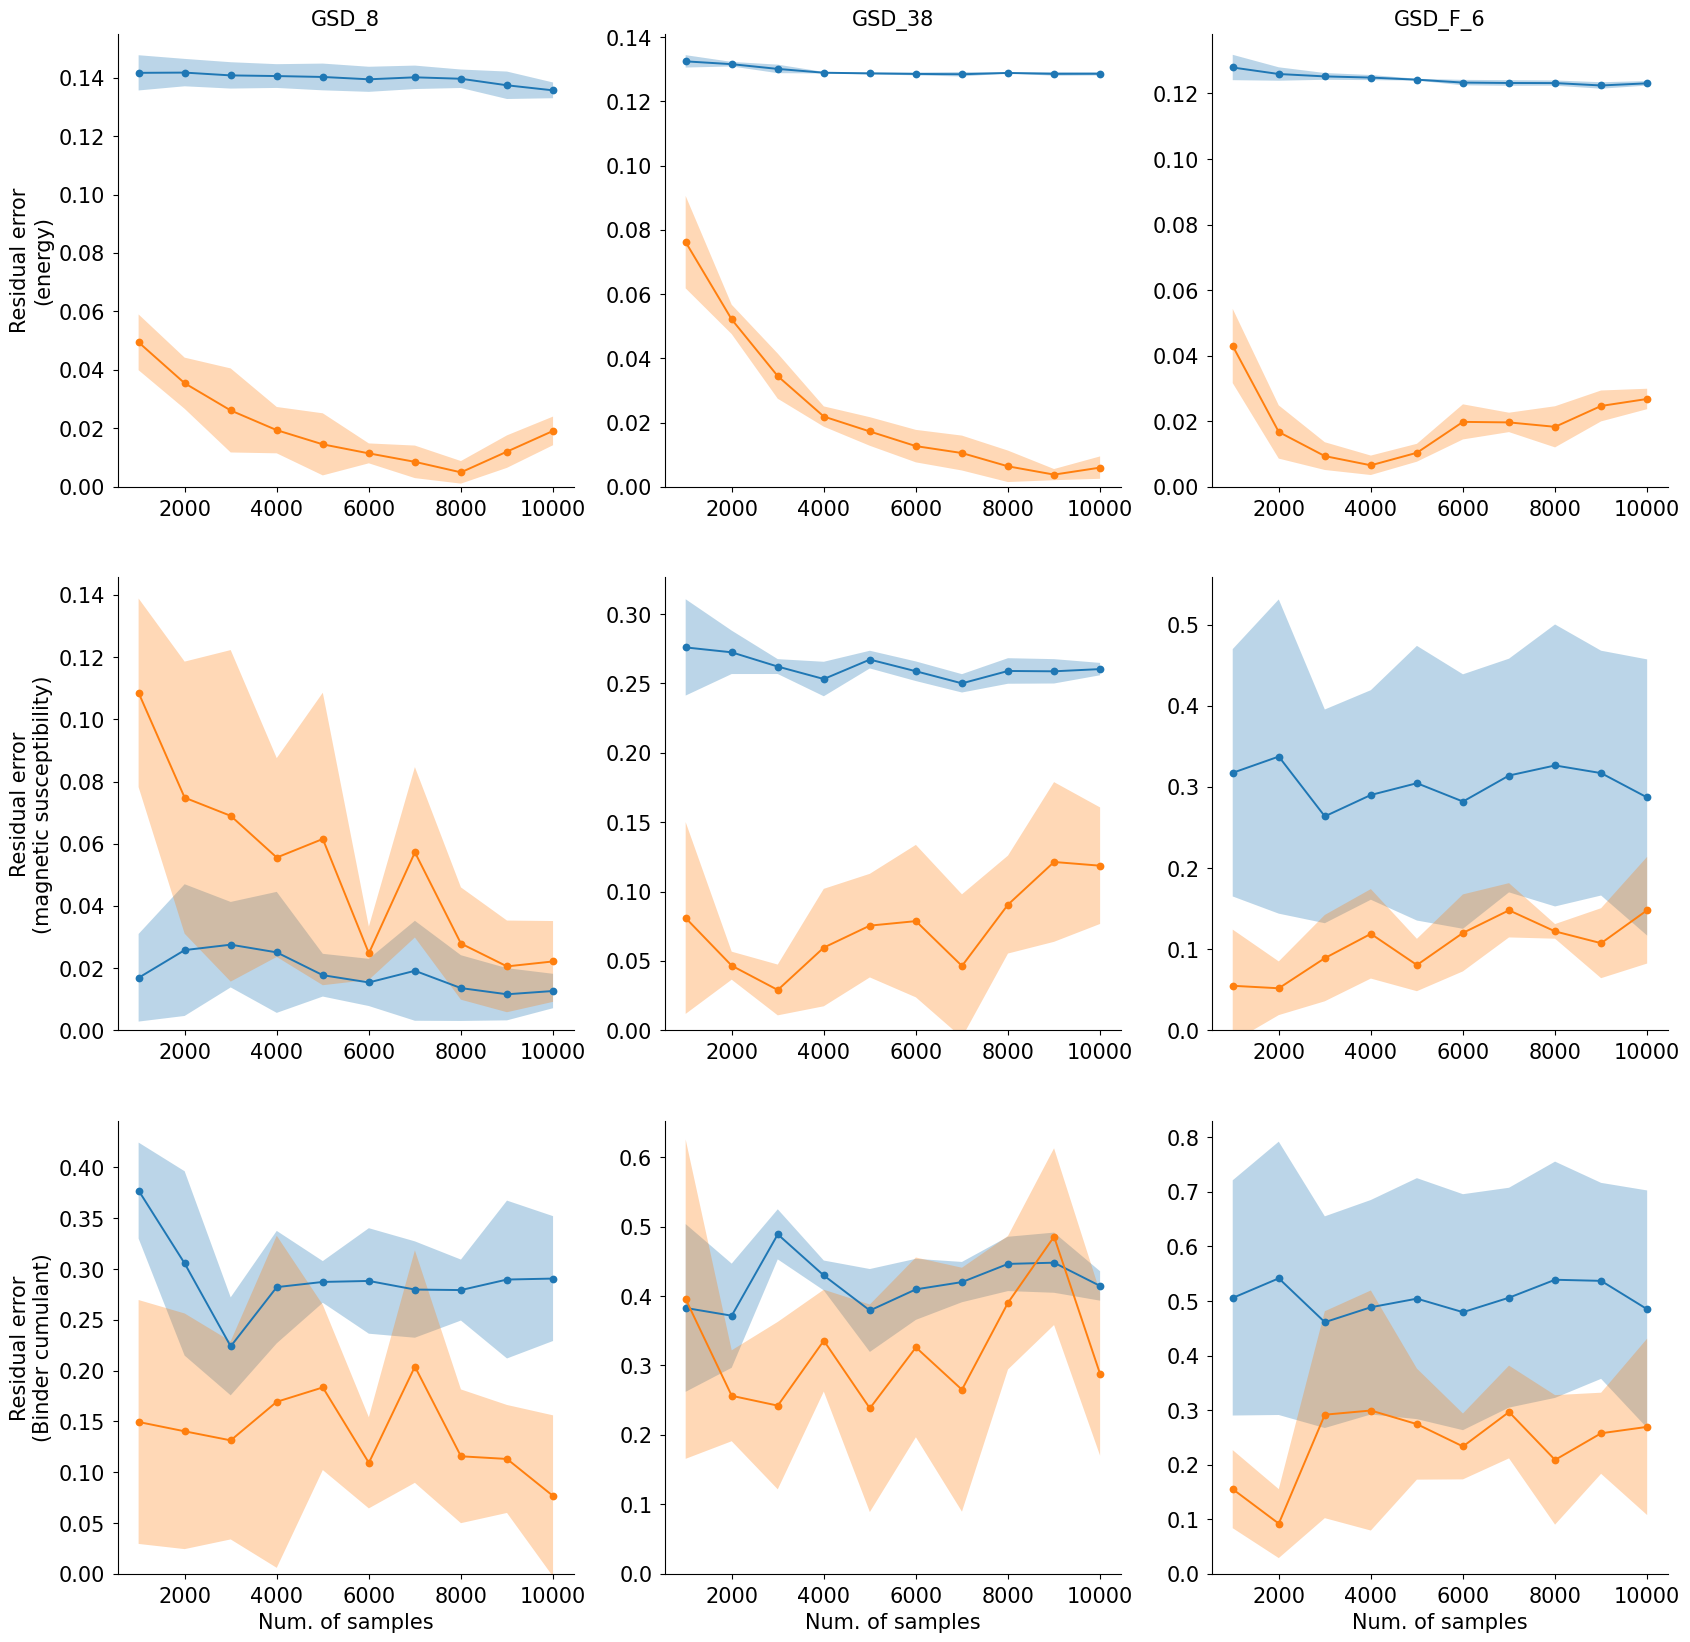

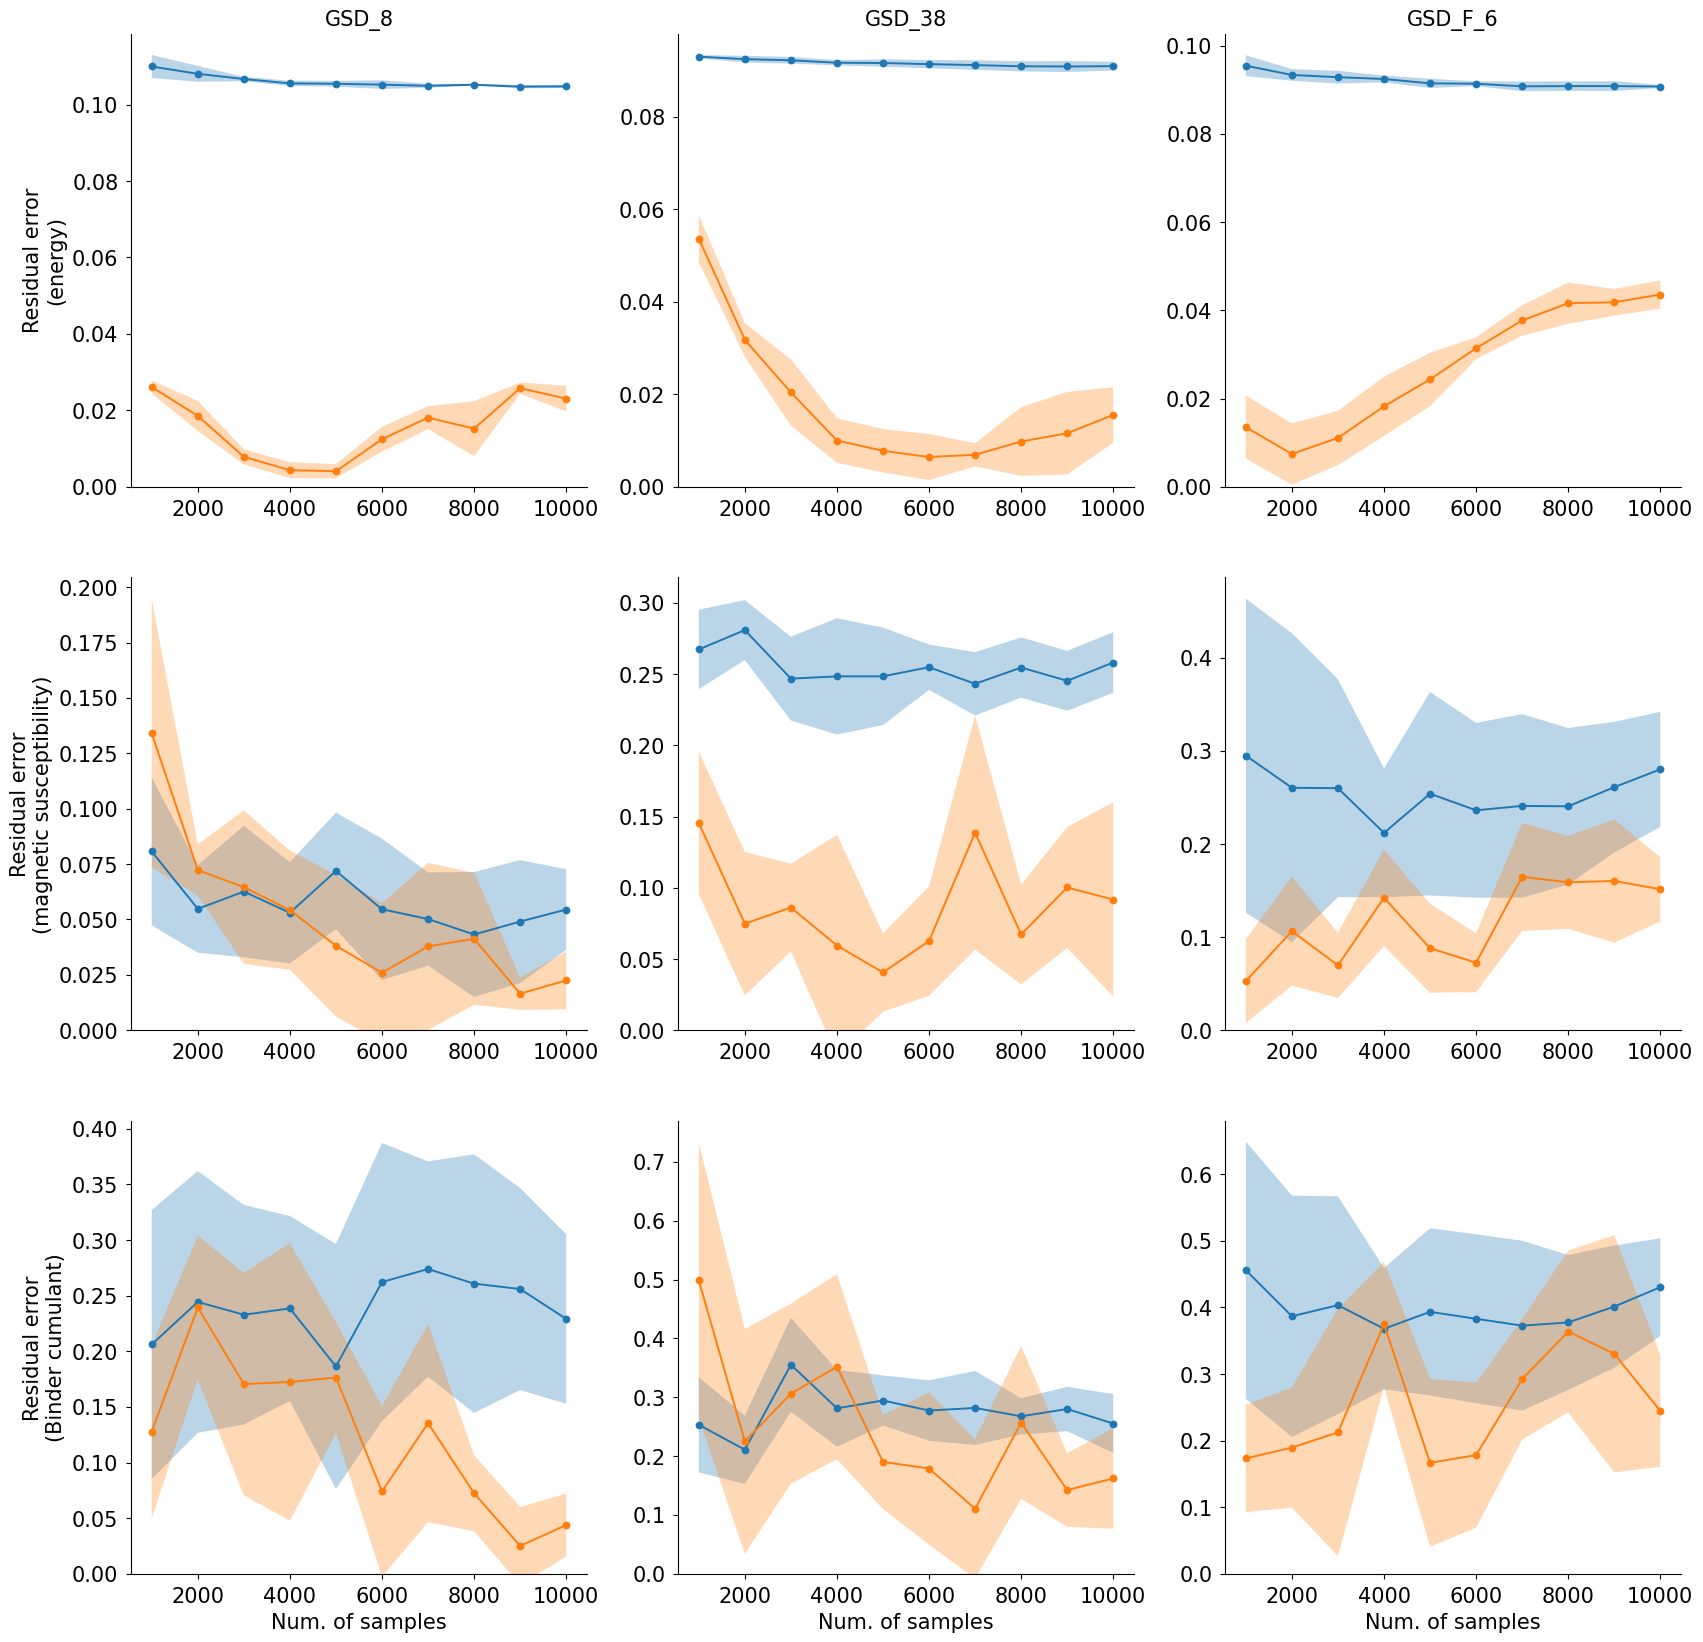

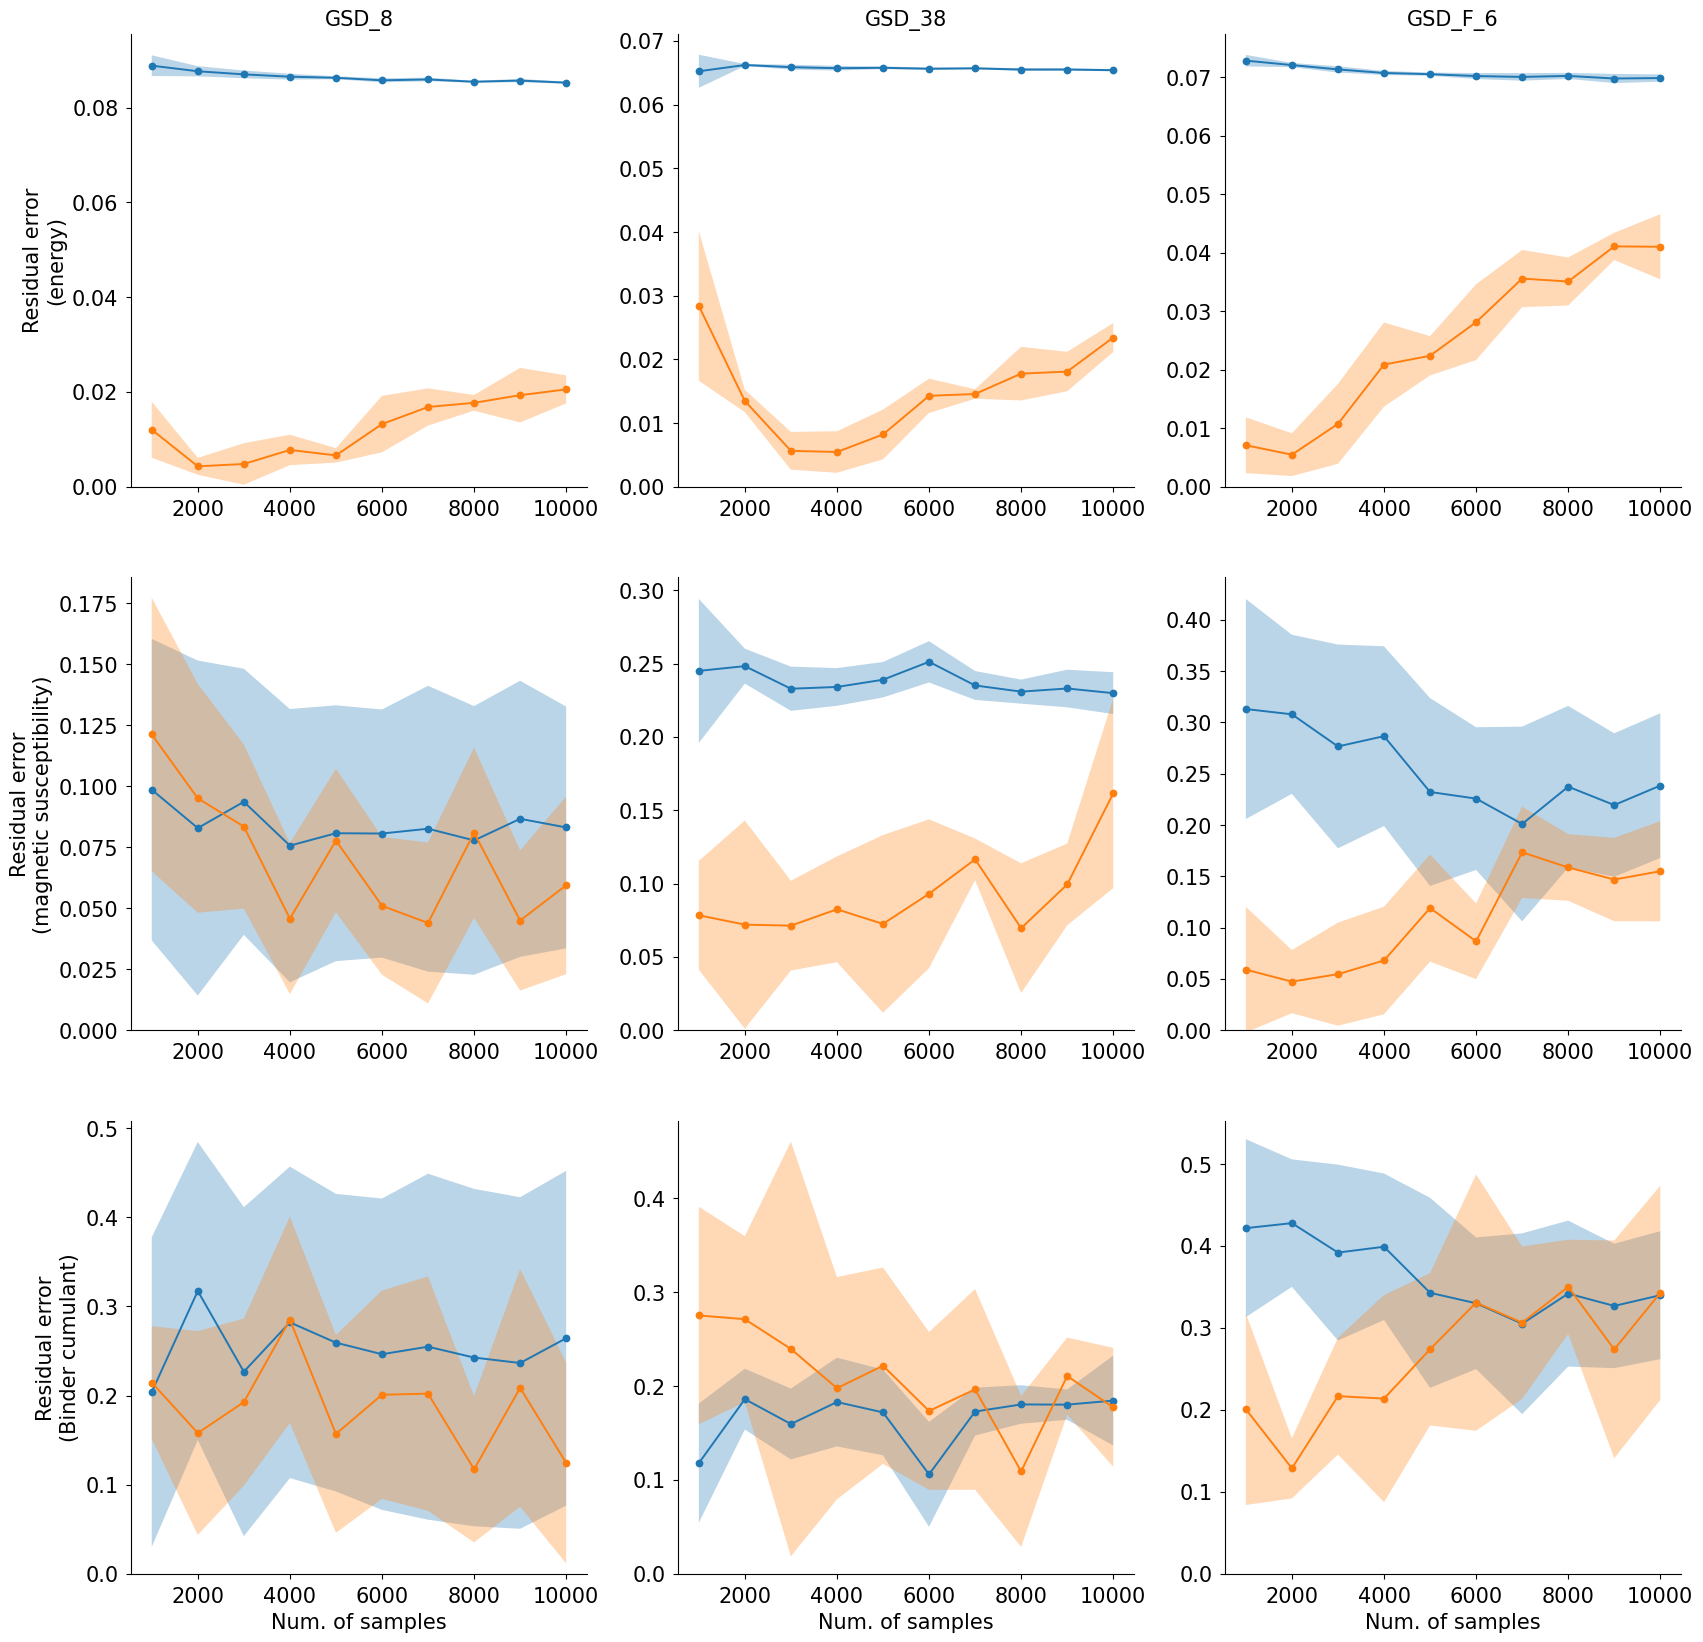

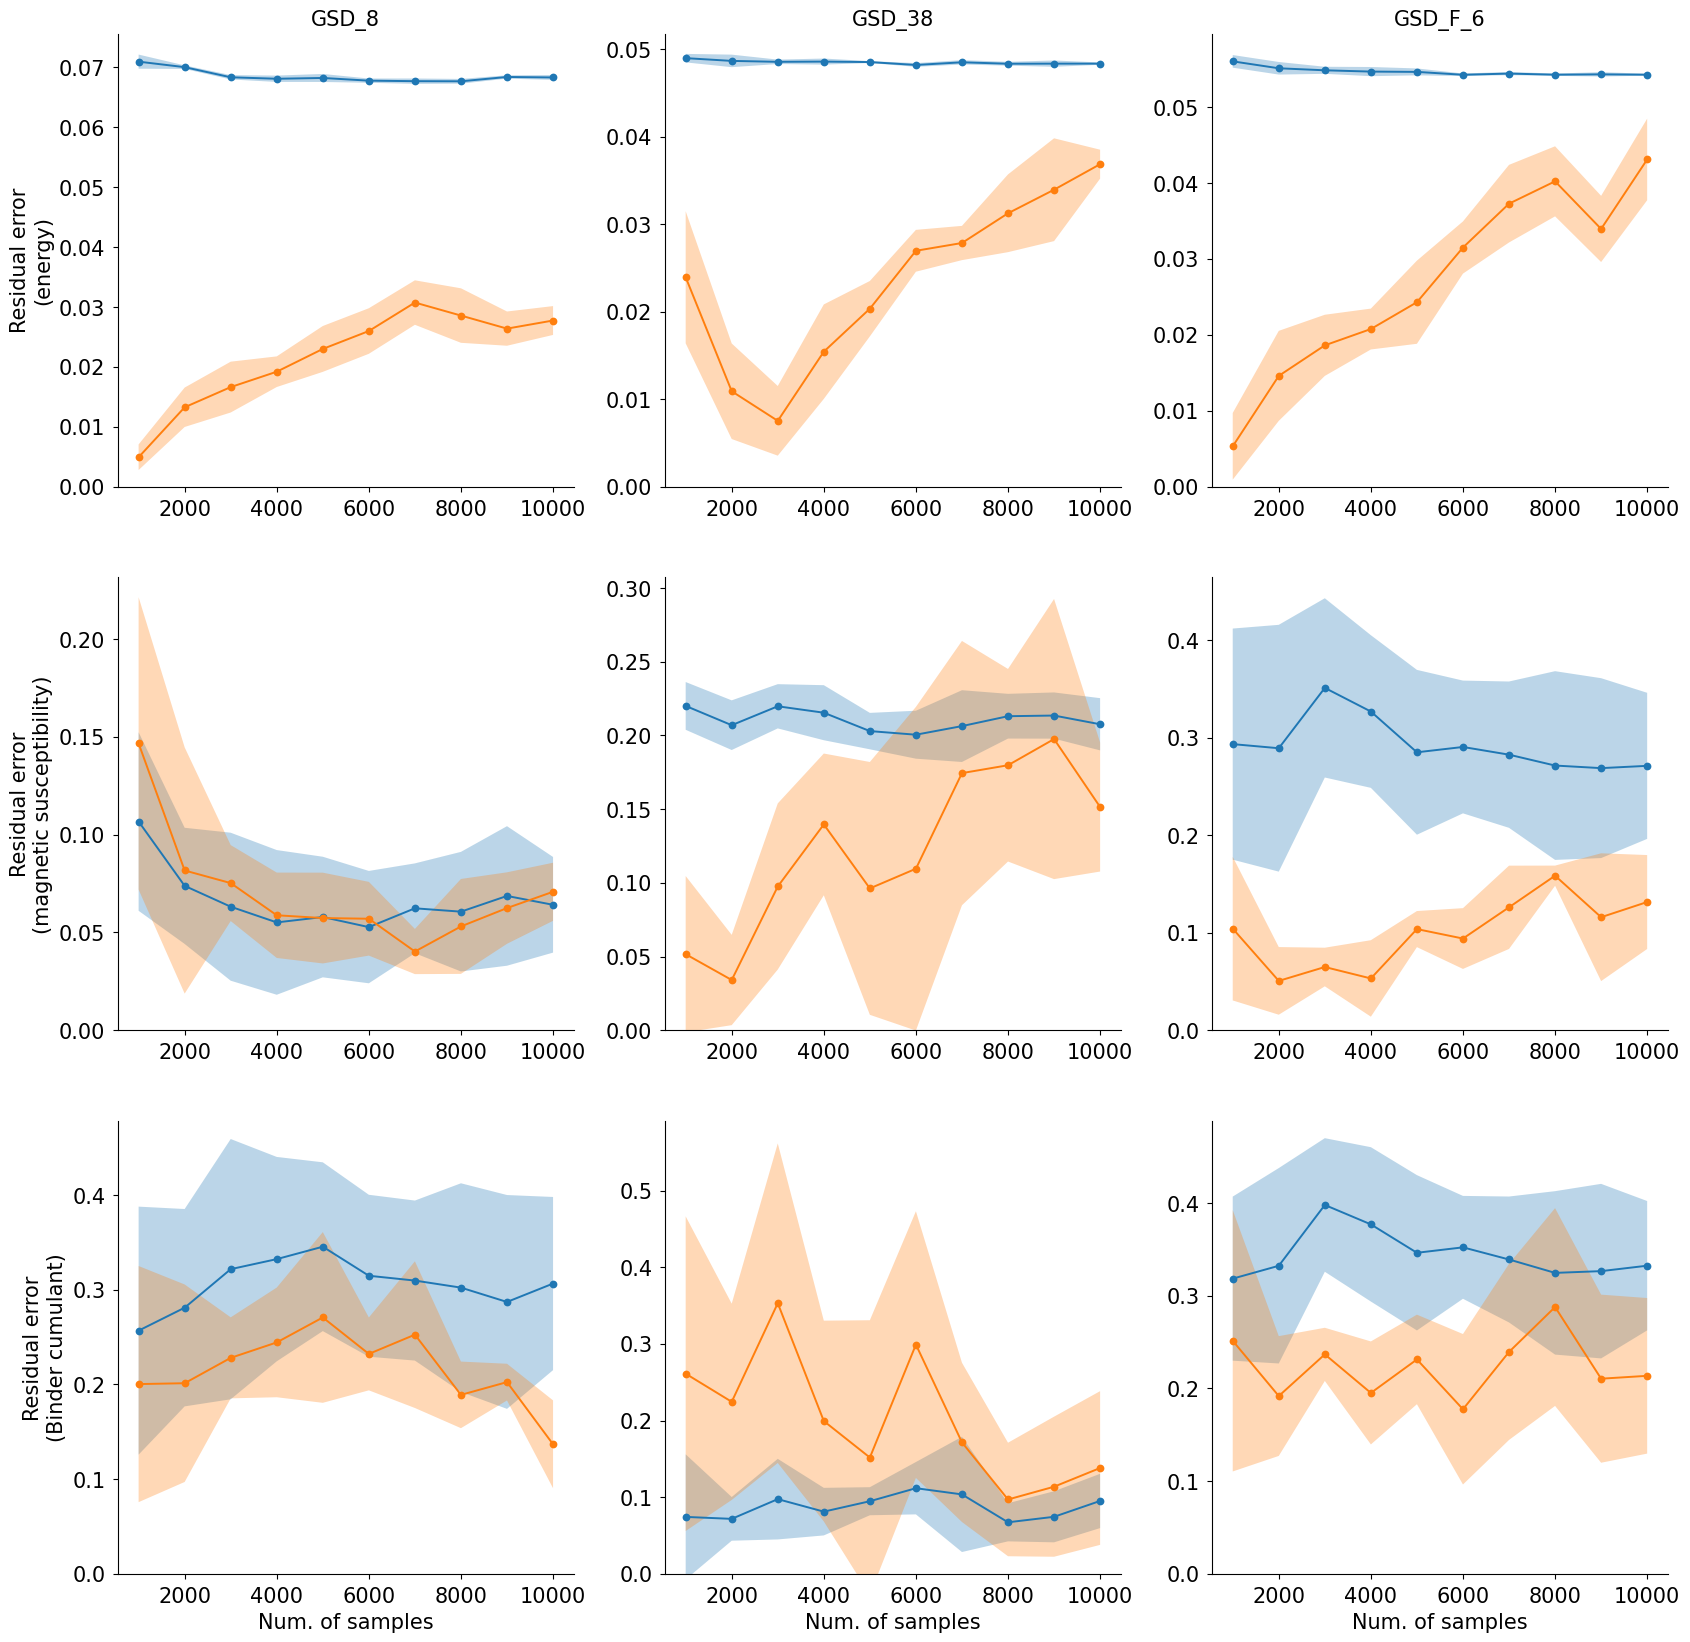

In [5]:
plt.style.use('seaborn-paper')
dat_list = ['energy', 'sus', 'u4']
n_sample_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
for target_temperature in target_temperature_list:
    count = 0
    fig, axs = plt.subplots(3, 3)
    axs = axs.flat
    fig.set_size_inches(20, 20)
    for k in dat_list:
        for PROBLEM in PROBLEM_LIST:
            ax = axs[count]
            PROBLEM_DIR_PATH = f"./problems/{PROBLEM}/"
            path = os.path.join(PROBLEM_DIR_PATH, f"raw_data_{annealing_time}_{target_temperature}.pickle.gz2")
            data = pload(path)
            exv = data[k]['exact']
            exact = []
            emp, corr = [], []
            emp_std, corr_std = [], []
            for i in range(len(n_sample_list)):
                emp_k_list = np.abs((np.array(data[k]['emp'][i]) - exv) / exv)
                emp.append(np.mean(emp_k_list))
                emp_std.append(np.std(emp_k_list))
                corr_k_list = np.abs((np.array(data[k]['corr'][i]) - exv) / exv)
                corr.append(np.mean(corr_k_list))
                corr_std.append(np.std(corr_k_list))
            emp = np.array(emp)
            corr = np.array(corr)
            emp_std = np.array(emp_std)
            corr_std = np.array(corr_std)

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.plot(n_sample_list, emp, 'o', linestyle='-', label='QA')
            ax.fill_between(n_sample_list, emp - emp_std, emp + emp_std, alpha=.3)
            ax.plot(n_sample_list, corr, 'o', linestyle='-', label='QA + SIS')
            ax.fill_between(n_sample_list, corr- corr_std, corr + corr_std, alpha=.3)
            ax.set_ylim(0)
            ax.tick_params(axis='both', which='major', labelsize=15)
            # if count == 2:
            if k == 'energy':
                ax.set_ylim(0)
            if k == 'sus':
                ax.set_ylim(0)
            if k == 'u4':
                ax.set_ylim(0)
            if k == 'energy' and count == 0:
                ax.set_ylabel('Residual error\n(energy)', fontsize=15)
            if k == 'sus' and count == 3:
                ax.set_ylabel('Residual error\n(magnetic susceptibility)', fontsize=15)
            if k == 'u4' and count == 6:
                ax.set_ylabel('Residual error\n(Binder cumulant)', fontsize=15)
            if count in [0, 1, 2]:
                ax.set_title(PROBLEM, fontsize=15)
            # if count == 3:
            # ax.legend(frameon=False,  bbox_to_anchor=(1.0,.8), fontsize=15)
            # if count == 4:
            ax.set_xticks([2000, 4000, 6000, 8000, 10000])
            if count in [6,7,8]:
                ax.set_xlabel('Num. of samples', fontsize=15)
            # ax.set_ylim(-30, -2.5)
            count += 1
    plt.savefig(os.path.join('figures', f'n_sample_error_{target_temperature}.pdf'), bbox_inches='tight', pad_inches=0.1)
    plt.savefig(os.path.join('figures', f'n_sample_error_{target_temperature}.png'), bbox_inches='tight', pad_inches=0.1)
    plt.show()
